In [1]:
from riffusion.streamlit.tasks import interpolation
from riffusion.datatypes import InferenceInput, PromptInput
import riffusion.streamlit.util as streamlit_util
from riffusion.spectrogram_params import SpectrogramParams
import pydub 

c:\Users\User\anaconda3\envs\riffusion\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-13 17:01:51.510 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
use_20k = True

if use_20k:
        params = SpectrogramParams(
            min_frequency=10,
            max_frequency=20000,
            sample_rate=44100,
            stereo=True,
        )
else:
        params = SpectrogramParams(
            min_frequency=0,
            max_frequency=10000,
            stereo=False,
        )
f1_wav = "test/test_data/mix1.wav"
f2_wav = "test/test_data/mix2.wav"

mix1_segment = streamlit_util.load_audio_file(f1_wav)
mix2_segment = streamlit_util.load_audio_file(f1_wav)

mixout_image = streamlit_util.spectrogram_image_from_audio(mix1_segment,params=params, device="cpu")

mixin_image = streamlit_util.spectrogram_image_from_audio(mix1_segment,params=params, device="cpu")
mixout_image
prompt_a = interpolation.create_prompt_input("Berlin Techno", 42, guidance=1)
prompt_b = interpolation.create_prompt_input("Deep House with funky Bassline", 42)

prompt_a

PromptInput(prompt='Berlin Techno', seed=42, negative_prompt='', denoising=0.0, guidance=1)

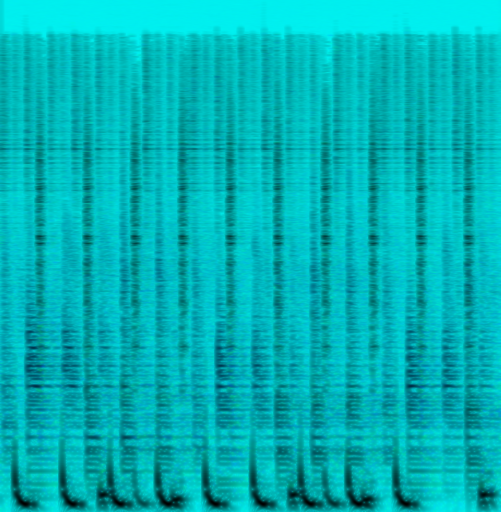

In [3]:
mixout_image

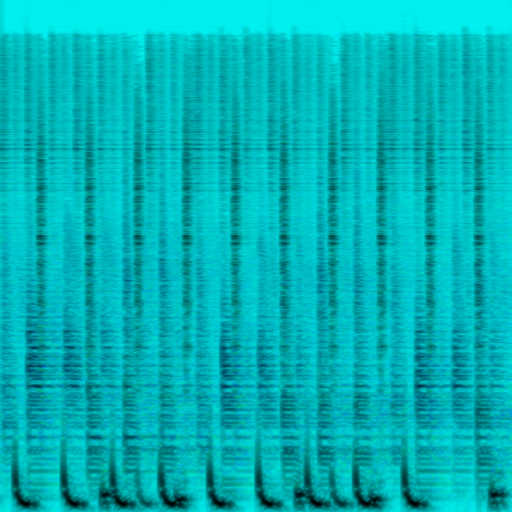

In [4]:
from PIL import Image
import numpy as np

def scale_image_to_32_stride(image: Image.Image) -> Image.Image:
    """
    Scale an image to a size that is a multiple of 32.
    """
    closest_width = int(np.ceil(image.width / 32) * 32)
    closest_height = int(np.ceil(image.height / 32) * 32)
    return image.resize((closest_width, closest_height), Image.BICUBIC)

mixout_image = scale_image_to_32_stride(mixout_image)
mixout_image

In [5]:


output_interpolation, combined_interpolation = interpolation.prepare_interpolation(
    extension='wav',
    num_interpolation_steps=1,
    num_inference_steps=1,
    guidance=1,
    init_image_name='custom',
    init_image_file=mixout_image,
    alpha_power=1.0,
    show_individual_outputs=False,
    show_images=False,
    prompt_a=prompt_a,
    prompt_b=prompt_b)

# Load the audio from the io.BytesIO object using pydub
audio = pydub.AudioSegment.from_file(output_interpolation)

# Convert the audio to a format that IPython can play (e.g., wav or mp3)
# You can export to another format if necessary
audio.export("temp_audio.wav", format="wav")

2025-01-13 17:01:52.060 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-13 17:01:52.064 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 17:01:52.206 
  command:

    streamlit run c:\Users\User\anaconda3\envs\riffusion\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-13 17:01:52.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 17:01:52.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<PIL.Image.Image image mode=RGB size=512x512 at 0x1CE52A4E9A0>
Using CPU device: cpu
Using device: cpu
Custom seed image provided
#### (1 / 1) Alpha=0.00


c:\Users\User\anaconda3\envs\riffusion\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Fetching 15 files: 100%|██████████| 15/15 [00:00<?, ?it/s]
2025-01-13 17:01:52.711 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 17:01:52.714 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
c:\Users\User\anaconda3\envs\riffusion\lib\site-packages\diffusers\modeling_utils.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECUR

InferenceInput(start=PromptInput(prompt='Berlin Techno', seed=42, negative_prompt='', denoising=0.0, guidance=1), end=PromptInput(prompt='Deep House with funky Bassline', seed=42, negative_prompt='', denoising=0.0, guidance=1.0), alpha=0.0, num_inference_steps=1, seed_image_id='og_beat', mask_image_id=None)
Guidance scale: 1.0



0it [00:00, ?it/s]
2025-01-13 17:02:21.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 17:02:21.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<_io.BufferedRandom name='temp_audio.wav'>